# Curso de Machine Learning Aplicado con Python

![Machine-Learning](assets/Machine-Learning.jpg)

## Feedback del modelamiento

### Como diseñar las features

El diseño de features puede llegar a ser mas importante que la optimizacion del modelo de ML,esto es por que al encodear de buena forma nuestras features
podemos lograr un excelente rendimiento

<div style="background-color:#78AB46">
<p>Mejorar la perfomance de nuestros modelos no solo para optimizar sus paramentros.</p>

<p>Una de las partes clave, y según algunos expertos la más importante, es la de **diseñar la representacion en la que se entregan los datos a los modelos** para que etos los procesen.</p>

<p>Esto equivale, en palabras más simples, en definir de forma inteligente las features(columnas) de nuestras tablas de datos.</p>
</div>

#### Ejemplo de feature engineering:

*El problema:*

Supongamos que estamos tratando de resolver el problema siguiente.

* Tenemos un problema de reconocer si ciertos datos con una sola feature son una clase 1 o de una clase 2(por ejemplo 'el producto esta deficiente' o 'el producto esta funcional').

* Por lo tanto estamos resolviendo una **clasificacion**

* Para esta clasificación decidimos tomar un SVM, que es un modelo poderoso que funciona buscando la 'mejor' recta que separa los puntos de cada clase.

![unadimension](assets/unadimension.png)

    Tenemos unos puntos de una dimension debido a que solo tenemos una columna

Debido a que el clasificador lo unico que hace es separar con una linea una clase de otra en nuestro ejemplo no seria bueno

Como podemos ver no existe un separador óptimo. Debemos para resolver el problema buscar un modeloaún más poderoso? No necesariamente.

#### Agregamos  una nueva feature:

![dosdimesiones](assets/dosdimensiones.png)

    Lo que hacemos es cojer la primera columna y elevarla al cuadrado para tener un plano de 2 dimensiones por que la 
    
$X[columna_2] = X[columna_1]^2$

**Esto es otro ejemplo que pasa de 2 dimensiones a 3 para hacer una buena clasificación**

![svm](assets/svm.png)

## Principios de diseño de Features

<div style="background-color:#78AB46">
Diseñar tus features es un arte más que una ciencia(por lo que en general te recomendamos ganar experiencia leyendo articulos cientificos y viendo soluciones)


</div>
1. **Features Informativas:** Tus features son más utiles mientras más correlacion tengan con tu variable objetivo.
2. **Features Independientes:** Para no tener redundancias tus features deberían ser lo más independientes posible entre ellas
3. **Cantidad de features controladas:** Nuestra intuición nos falla en dimensiones superiores a 3. En la mayoria de los casos aumentar la cantidad de features afecta negativamente la perfomance si no contamos con una gran cantidad de datos. Por ultimo pocas features aseguran una mejor interpretabilidad de los modelos-

**Ejemplo de feature informativa y feature no informativa**

<p style="color:#397D02">Predecir el <b>precio de una casa</b> en <b>función de sus metros cuadrados</b></p>

<p style="color:#fb4040">Predecir el <b>precio de una casa</b> en <b>función a la temperatura del mar</b></p>

Es importante entender la correlacion entre la feature y la variable objetivo.


#### Visualizar interdependencia entre variables

In [15]:
import pandas as pd
#eliminamos nuestra columna target
#X = pd.read_csv('X.csv').drop(['Worldwide Gross','gross'],axis=1)
X = pd.read_csv('https://raw.githubusercontent.com/renemorenow/MachineLearning-Python/master/X.csv',encoding='utf-8',sep=',').drop(['Worldwide Gross','gross'],axis=1)

In [16]:
X.head()

Production Budget  num_critic_for_reviews      duration  \
0        425000000.0            7.230000e+02  1.780000e+02   
1        410600000.0            4.480000e+02  1.360000e+02   
2        330600000.0            6.350000e+02  1.410000e+02   
3        306000000.0            1.182331e+09  1.182331e+09   
4        300000000.0            6.317102e+08  6.317102e+08   

   director_facebook_likes  actor_3_facebook_likes  actor_1_facebook_likes  \
0             0.000000e+00            8.550000e+02            1.000000e+03   
1             2.520000e+02            1.000000e+03            4.000000e+04   
2             0.000000e+00            1.900000e+04            2.600000e+04   
3             1.182331e+09            1.182331e+09            1.182331e+09   
4             6.317102e+08            6.317102e+08            6.317102e+08   

   num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
0     8.862040e+05               4.834000e+03          0.000000e+00   
1     3.707040e+05               5.408300e+04          4.000000e+00   
2     4.626690e+05               9.200000e+04          4.000000e+00   
3     1.182331e+09               1.182331e+09          1.182331e+09   
4     6.317102e+08               6.317102e+08          6.317102e+08   

   num_user_for_reviews        budget    title_year  actor_2_facebook_likes  \
0          3.054000e+03  2.370000e+08  2.009000e+03            9.360000e+02   
1          4.840000e+02  2.500000e+08  2.011000e+03            1.100000e+04   
2          1.117000e+03  2.500000e+08  2.015000e+03            2.100000e+04   
3          1.182331e+09  1.182331e+09  1.182331e+09            1.182331e+09   
4          6.317102e+08  6.317102e+08  6.317102e+08            6.317102e+08   

     imdb_score  aspect_ratio  movie_facebook_likes  
0  7.900000e+01  1.780000e+02          3.300000e+04  
1  6.700000e+01  2.350000e+02          5.800000e+04  
2  7.500000e+01  2.350000e+02          1.180000e+05  
3  1.182331e+09  1.182331e+09          1.182331e+09  
4  6.317102e+08  6.317102e+08          6.317102e+08

In [17]:
import seaborn as sns
%matplotlib inline
#Buscando la correlacion entre las features
print("Entre mas correlacion tenga mas se aproxima a 1")
X.corr()

Entre mas correlacion tenga mas se aproxima a 1


Production Budget  num_critic_for_reviews  \
Production Budget                   1.000000                0.330163   
num_critic_for_reviews              0.330163                1.000000   
duration                            0.331477                0.999441   
director_facebook_likes             0.330177                1.000000   
actor_3_facebook_likes              0.330136                0.999989   
actor_1_facebook_likes              0.330217                0.999999   
num_voted_users                     0.331182                0.999997   
cast_total_facebook_likes           0.330251                0.999999   
facenumber_in_poster                0.332303                0.999599   
num_user_for_reviews                0.330172                1.000000   
budget                              0.596600                0.593015   
title_year                          0.330174                1.000000   
actor_2_facebook_likes              0.330188                1.000000   
imdb_score                          0.330171                1.000000   
aspect_ratio                        0.331216                0.999371   
movie_facebook_likes                0.330286                0.999999   

                           duration  director_facebook_likes  \
Production Budget          0.331477                 0.330177   
num_critic_for_reviews     0.999441                 1.000000   
duration                   1.000000                 0.999441   
director_facebook_likes    0.999441                 1.000000   
actor_3_facebook_likes     0.999431                 0.999990   
actor_1_facebook_likes     0.999441                 1.000000   
num_voted_users            0.999437                 0.999997   
cast_total_facebook_likes  0.999441                 1.000000   
facenumber_in_poster       0.999040                 0.999599   
num_user_for_reviews       0.999441                 1.000000   
budget                     0.593209                 0.593025   
title_year                 0.999441                 1.000000   
actor_2_facebook_likes     0.999441                 1.000000   
imdb_score                 0.999441                 1.000000   
aspect_ratio               0.999930                 0.999371   
movie_facebook_likes       0.999441                 1.000000   

                           actor_3_facebook_likes  actor_1_facebook_likes  \
Production Budget                        0.330136                0.330217   
num_critic_for_reviews                   0.999989                0.999999   
duration                                 0.999431                0.999441   
director_facebook_likes                  0.999990                1.000000   
actor_3_facebook_likes                   1.000000                0.999990   
actor_1_facebook_likes                   0.999990                1.000000   
num_voted_users                          0.999987                0.999997   
cast_total_facebook_likes                0.999990                1.000000   
facenumber_in_poster                     0.999589                0.999599   
num_user_for_reviews                     0.999990                1.000000   
budget                                   0.593083                0.593045   
title_year                               0.999990                1.000000   
actor_2_facebook_likes                   0.999990                1.000000   
imdb_score                               0.999990                1.000000   
aspect_ratio                             0.999361                0.999371   
movie_facebook_likes                     0.999990                1.000000   

                           num_voted_users  cast_total_facebook_likes  \
Production Budget                 0.331182                   0.330251   
num_critic_for_reviews            0.999997                   0.999999   
duration                          0.999437                   0.999441   
director_facebook_likes           0.999997                   1.000000   
actor_3_facebook_likes            0.99

mientras menos esten relacionadas mejor por que eso significa que nuestras features son independientes


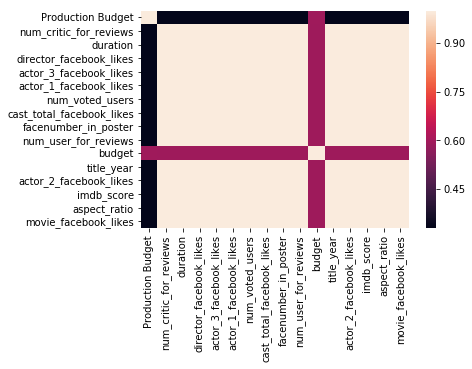

In [18]:
print("mientras menos esten relacionadas mejor por que eso significa que nuestras features son independientes")
sns.heatmap(X.corr())

## La maldición de la dimensión 
<hr/>

*Datasaurus Dozen y Anscombe's quartet:*

Utilidad de la capacidad de entender los datos en 1, 2 y 3 dimensiones del ojo humano.

*Maldición de la dimensionalidad:*

En **dimensión superior o igual a 4**, nuestra capacidad de entender los datos se pierde, **y aún peor fenomenos extraños/contraproducentes ocurren**

<hr/>

En conclusion es bueno mantener todo en dimensiones bajas entendibles